In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, metrics

# No 1

In [2]:
df=pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [22]:
#Checking Missing Value

In [23]:
df.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu'], axis = 'columns', inplace = True)

In [24]:
df_update = df.copy()

floating_cols = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
df_update[floating_cols] = df_update[floating_cols].fillna(df_update[floating_cols].median())
df_update['MasVnrType'] = df_update['MasVnrType'].fillna(df_update['MasVnrType'].mode()[0])
df_update['BsmtQual'] = df_update['BsmtQual'].fillna(df_update['BsmtQual'].mode()[0])
df_update['BsmtExposure'] = df_update['BsmtExposure'].fillna(df_update['BsmtExposure'].mode()[0])
df_update['BsmtCond'] = df_update['BsmtCond'].fillna(df_update['BsmtCond'].mode()[0])
df_update['BsmtFinType2'] = df_update['BsmtFinType2'].fillna(df_update['BsmtFinType2'].mode()[0])
df_update['Electrical'] = df_update['Electrical'].fillna(df_update['Electrical'].mode()[0])
df_update['GarageType'] = df_update['GarageType'].fillna(df_update['GarageType'].mode()[0])
df_update['GarageFinish'] = df_update['GarageFinish'].fillna(df_update['GarageFinish'].mode()[0])
df_update['GarageQual'] = df_update['GarageQual'].fillna(df_update['GarageQual'].mode()[0])
df_update['GarageCond'] = df_update['GarageCond'].fillna(df_update['GarageCond'].mode()[0])
df_update['BsmtFinType1'] = df_update['BsmtFinType1'].fillna(df_update['BsmtFinType1'].mode()[0])

In [25]:
df_update.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [26]:
#linear Regression
lr = df_update[['OverallQual', 'GrLivArea', 'GarageCars', 'SalePrice']]

In [27]:
lr_dummy = pd.get_dummies(lr)
lr_dummy.head()

,OverallQual,GrLivArea,GarageCars,SalePrice
0,7,1710,2,208500
1,6,1262,2,181500
2,7,1786,2,223500
3,7,1717,3,140000
4,8,2198,3,250000


In [28]:
#X dan Y
X = lr_dummy.loc[:, lr_dummy.columns != 'SalePrice']
y = lr_dummy['SalePrice']

In [29]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                    random_state=1)

In [30]:
 # create linear regression object
reg = linear_model.LinearRegression()
 
# train the model using the training sets
reg.fit(X_train, y_train)
 
# regression coefficients
print('Coefficients: ', reg.coef_)

# regression intercept
print('Intercept: ', reg.intercept_)

Coefficients:  [26405.36646733    52.47724945 21195.68361667]
Intercept:  -97198.68053864117


In [31]:
y_pred = reg.predict(X_test)

In [32]:
#evaluasi
#MAE
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

28189.81473259219

In [33]:
# MSE
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

1665214203.9063032

In [34]:
# RMSE
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred, squared=False)

40807.03620585919

In [35]:
# R-Square
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7480604026203846

Variance score: 0.7480604026203846


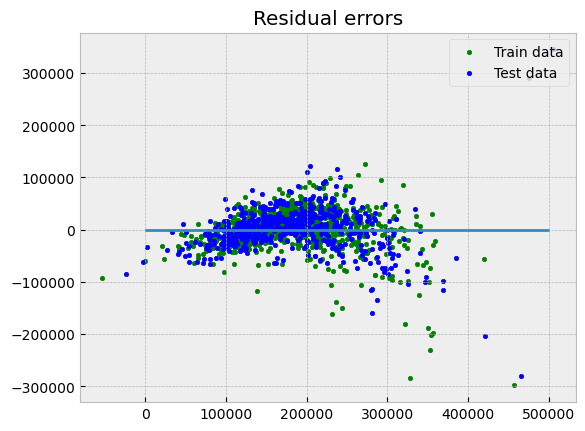

In [36]:
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_test, y_test)))
 
# plot untuk menampilkan residual error
 
## setting plot style
plt.style.use('bmh')
 
## plotting residual errors untuk training data
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')
 
## plotting residual errors untuk test data
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
 
## plotting garis lurus untuk zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 500000, linewidth = 2)
 
## keterangan plotting
plt.legend(loc = 'upper right')
 
## Judul plot 
plt.title("Residual errors")
 
plt.show()


# No 2

In [37]:
df=pd.read_csv("heart (1).csv")
df.head

<bound method NDFrame.head of      Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease

In [38]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [39]:
df["HeartDisease"].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [40]:
from sklearn.utils import resample

#create two different dataframe of majority and minority class 
df_majority = df[(df['HeartDisease']==1)] 
df_minority = df[(df['HeartDisease']==0)] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 508, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

In [41]:
df_upsampled["HeartDisease"].value_counts()

0    508
1    508
Name: HeartDisease, dtype: int64

In [42]:
#One Hot Encoding
df = pd.get_dummies(df)
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    int64  
 1   RestingBP          918 non-null    int64  
 2   Cholesterol        918 non-null    int64  
 3   FastingBS          918 non-null    int64  
 4   MaxHR              918 non-null    int64  
 5   Oldpeak            918 non-null    float64
 6   HeartDisease       918 non-null    int64  
 7   Sex_F              918 non-null    uint8  
 8   Sex_M              918 non-null    uint8  
 9   ChestPainType_ASY  918 non-null    uint8  
 10  ChestPainType_ATA  918 non-null    uint8  
 11  ChestPainType_NAP  918 non-null    uint8  
 12  ChestPainType_TA   918 non-null    uint8  
 13  RestingECG_LVH     918 non-null    uint8  
 14  RestingECG_Normal  918 non-null    uint8  
 15  RestingECG_ST      918 non-null    uint8  
 16  ExerciseAngina_N   918 non

In [44]:
#Definisikan X dan y
X = df.loc[:, df.columns != "HeartDisease"]
y = df["HeartDisease"]

In [45]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                    random_state=1)

In [46]:
 # create linear regression object
reg = linear_model.LinearRegression()
 
# train the model using the training sets
reg.fit(X_train, y_train)
 
# regression coefficients
print('Coefficients: ', reg.coef_)

# regression intercept
print('Intercept: ', reg.intercept_)


Coefficients:  [ 0.00361052  0.00034214 -0.00066327  0.12696234 -0.00021182  0.0533196
 -0.07834886  0.07834886  0.17766935 -0.06551916 -0.0674586  -0.04469158
  0.01873343  0.01016502 -0.02889845 -0.06673355  0.06673355  0.01317791
  0.17008646 -0.18326437]
Intercept:  0.27274958895396206


In [47]:
#Regresi Logistik
from sklearn.linear_model import LogisticRegression 
lr = LogisticRegression(solver ='lbfgs', max_iter=10000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [48]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier 
classifier_rf = RandomForestClassifier(random_state= 42, n_jobs=-1, max_depth=5,
                                      n_estimators=100, oob_score=True)

In [49]:
#Hyperparameter Tuning

In [50]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [51]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

In [52]:
from sklearn.model_selection import GridSearchCV

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [53]:
grid_search.best_score_

0.8708611022955675

In [54]:
rf_best = grid_search.best_estimator_
rf_best.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=50,
                       n_jobs=-1, random_state=42)

In [55]:
#Decision Tree

In [56]:
from sklearn import tree
import matplotlib.pyplot as plt
import matplotlib.image as pltimg

dtree = tree.DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)

In [57]:
text_representation = tree.export_text(dtree)
print(text_representation)

|--- feature_19 <= 0.50
|   |--- feature_4 <= 151.00
|   |   |--- feature_6 <= 0.50
|   |   |   |--- feature_8 <= 0.50
|   |   |   |   |--- feature_4 <= 130.50
|   |   |   |   |   |--- feature_12 <= 0.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_12 >  0.50
|   |   |   |   |   |   |--- feature_4 <= 117.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_4 >  117.00
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_4 >  130.50
|   |   |   |   |   |--- feature_4 <= 144.50
|   |   |   |   |   |   |--- feature_2 <= 244.00
|   |   |   |   |   |   |   |--- feature_5 <= -0.35
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_5 >  -0.35
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_2 >  244.00
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_4 >  144.50
|   |   |   |   |   |   |--- feature_1 <= 132.00
|   |   |   |   

In [58]:
#Evaluation

In [59]:
y_lr = lr.predict(X_test)
y_dtree = dtree.predict(X_test)
y_rf = rf_best.predict(X_test)

In [60]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_lr))
print(accuracy_score(y_test, y_dtree))
print(accuracy_score(y_test, y_rf))

0.8668478260869565
0.7690217391304348
0.875


In [61]:
from sklearn.metrics import precision_score
print(precision_score(y_test, y_lr, average='macro'))
print(precision_score(y_test, y_dtree, average='macro'))
print(precision_score(y_test, y_rf, average='macro'))

0.8619501378401055
0.7690217391304348
0.8731492597038815


In [62]:
from sklearn.metrics import recall_score
print(recall_score(y_test, y_lr, average='macro'))
print(recall_score(y_test, y_dtree, average='macro'))
print(recall_score(y_test, y_rf, average='macro'))

0.8671986624107006
0.7768809849521203
0.8685210518315853


In [63]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_lr))
print(confusion_matrix(y_test, y_dtree))
print(confusion_matrix(y_test, y_rf))

[[133  20]
 [ 29 186]]
[[126  27]
 [ 58 157]]
[[127  26]
 [ 20 195]]


In [64]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_lr, pos_label=1) # pos_label: positive label
print(auc(fpr, tpr))
fpr, tpr, thresholds = roc_curve(y_test, y_dtree, pos_label=1) # pos_label: positive label
print(auc(fpr, tpr))
fpr, tpr, thresholds = roc_curve(y_test, y_rf, pos_label=1) # pos_label: positive label
print(auc(fpr, tpr))

0.8671986624107006
0.7768809849521204
0.8685210518315852


In [65]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_lr))
print(classification_report(y_test, y_dtree))
print(classification_report(y_test, y_rf))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       153
           1       0.90      0.87      0.88       215

    accuracy                           0.87       368
   macro avg       0.86      0.87      0.86       368
weighted avg       0.87      0.87      0.87       368

              precision    recall  f1-score   support

           0       0.68      0.82      0.75       153
           1       0.85      0.73      0.79       215

    accuracy                           0.77       368
   macro avg       0.77      0.78      0.77       368
weighted avg       0.78      0.77      0.77       368

              precision    recall  f1-score   support

           0       0.86      0.83      0.85       153
           1       0.88      0.91      0.89       215

    accuracy                           0.88       368
   macro avg       0.87      0.87      0.87       368
weighted avg       0.87      0.88      0.87       368

